In [1]:
import matplotlib
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
from skimage.io import imread, imshow
import os
import glob
import pandas as pd

from _helper_functions import hueShift,hsv_to_rgb,rgb_to_hsv,resize_aspect_fit,get_hue_sift

# ----------------------------------TRAIN DATA----------------------------------------

In [2]:
path = '/Users/toothless/Downloads/Thesis/data/Train/original/_nocancer/'

nocan_re = resize_aspect_fit(path,150)

nocan_re.shape

(6778, 150, 150, 3)

In [3]:
path = '/Users/toothless/Downloads/Thesis/data/Train/original/cancer/'

can_re = resize_aspect_fit(path,150)

can_re.shape

(7272, 150, 150, 3)

In [4]:
can_huesift = get_hue_sift(can_re)

In [5]:
nocan_huesift = get_hue_sift(nocan_re)

In [6]:
train_can , test_can = can_huesift[:6544] , can_huesift[6544:]
train_ncan , test_ncan = nocan_huesift[:6100],nocan_huesift[6100:]

In [9]:
t_img = Image.fromarray(train_can[0].astype(np.uint8))

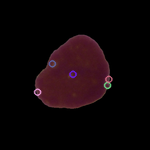

In [13]:
t_img

In [7]:
print(train_can.shape)
print(test_can.shape)
print(train_ncan.shape)
print(test_ncan.shape)

(6544, 150, 150, 3)
(728, 150, 150, 3)
(6100, 150, 150, 3)
(678, 150, 150, 3)


In [19]:
can_labels = np.ones(train_can.shape[0])
nocan_labels = np.zeros(train_ncan.shape[0])

#Cancatenate Features and labels
features = np.concatenate((train_can,train_ncan),axis = 0)
labels = np.concatenate((can_labels,nocan_labels) , axis = 0)

#reshape features array
features = np.reshape(features,(features.shape[0],150*150*3))

# save labels and features to dataframe and shuffle data
train_df = pd.DataFrame(features)
train_df['labels'] = labels

train_df  = train_df.sample(frac=1).reset_index(drop=True)

In [20]:
# Convert Features to Array and Save it
labels = train_df.pop('labels')
features = train_df.values

features = np.reshape(features,(features.shape[0],150,150,3))

In [27]:
F_img = Image.fromarray(features[5].astype(np.uint8))

In [29]:
# Save test Features
np.savez_compressed('/Users/toothless/Downloads/Thesis_Results/HUESIFT+CNN/data/Train_HUE_SIFT_v2',
                    features=features, labels=labels)

# -------------------------------------TEST DATA-----------------------------------------

In [30]:
testcan_labels = np.ones(test_can.shape[0])
testnocan_labels = np.zeros(test_ncan.shape[0])

#Cancatenate Features and labels
features = np.concatenate((test_can,test_ncan),axis = 0)
labels = np.concatenate((testcan_labels,testnocan_labels) , axis = 0)

#reshape features array
features = np.reshape(features,(features.shape[0],150*150*3))

# save labels and features to dataframe and shuffle data
test_df = pd.DataFrame(features)
test_df['labels'] = labels

test_df  = test_df.sample(frac=1).reset_index(drop=True)

In [31]:
# Convert Features to Array and Save it
labels = test_df.pop('labels')
features = test_df.values

#reshape before saving
features = np.reshape(features,(features.shape[0],150,150,3))

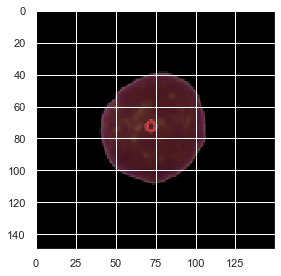

In [32]:
imshow(features[0])

In [33]:
# Save test Features
np.savez_compressed('/Users/toothless/Downloads/Thesis_Results/HUESIFT+CNN/data/Test_HUE_SIFT_v2',
                    features=features, labels=labels)